# CCR Regeneration Catalyst Project Grayscale Model

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading data
data = pd.read_excel(r'C:\Users\z_ref_analyst1\Desktop\RGB_regeneration\grayscale_data\may_train.xlsx') # Provide data location here
#data_test = pd.read_excel(r'C:\Users\z_ref_analyst1\Desktop\Grayscale_CCR\gr_test.xlsx')

Exploring data

In [3]:
data.head()

,Unnamed: 0,Grayscale,files,output
0,0,149.497044,1,0.08
1,27,148.371279,2,0.08
2,38,150.835953,3,0.08
3,49,149.813929,4,0.08
4,60,140.410024,5,0.04


In [4]:
data.drop(['Unnamed: 0', 'files'],axis=1, inplace=True)

In [5]:
len(data)

115

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Grayscale,115.0,150.545738,4.438967,120.878571,148.829488,151.132908,153.243019,157.00409
output,115.0,0.084522,0.035050,0.040000,0.050000,0.080000,0.115000,0.15000


Checking distribution

C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_12204\2505215319.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins = 10)


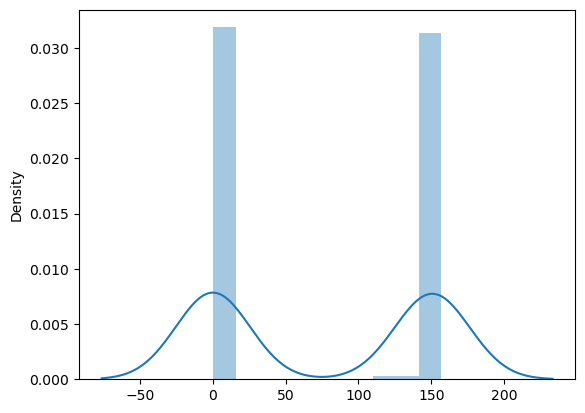

In [7]:
sns.distplot(data, bins = 10)
plt.show()

Plotting Correlation plot

In [8]:
#data_test.head()

In [9]:
#data_test.drop(['Unnamed: 0', 'files'], axis = 1, inplace=True)

In [10]:
data.head()

,Grayscale,output
0,149.497044,0.08
1,148.371279,0.08
2,150.835953,0.08
3,149.813929,0.08
4,140.410024,0.04


### Using Simple Linear Regression Model

In [11]:
model_lr = LinearRegression() # Linear Regression model
scaler = StandardScaler() # Standard scalar
normalizer = MinMaxScaler()

#Feature scaling is one of the most important data preprocessing step in machine learning. 
# Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled.
# Normalization or Min-Max Scaling:
# Normalization or Min-Max Scaling is used to transform features to be on a similar scale. The new point is calculated as: X_new = (X - X_min)/(X_max - X_min)
# This scales the range to [0, 1] or sometimes [-1, 1]. 
# Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube.
# Normalization is useful when there are no outliers as it cannot cope up with them. 
# Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.


# Standardization or Z-Score Normalization:
# Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.
# X_new = (X - mean)/Std

# Standardization can be helpful in cases where the data follows a Gaussian distribution. 
# However, this does not have to be necessarily true. 
# Geometrically speaking, it translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively. 
# We can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.

# Standardization does not get affected by outliers because there is no predefined range of transformed features.


#Difference between Normalization and Standardization

# Sr.NO.	# Normalization	                                                                       # Standardization
# 1.	# Minimum and maximum value of features are used                                           # for scaling Mean and standard deviation is used for scaling.
# 2.	# It is used when features are of different scales.  	                               # It is used when we want to ensure zero mean and unit standard deviation.
# 3.	# Scales values between [0, 1] or [-1, 1].	                                         # It is not bounded to a certain range.
# 4.	# It is really affected by outliers.	                                                   # It is much less affected by outliers.
# 5.	# Scikit-Learn provides a transformer called MinMaxScaler for Normalization.	           # Scikit-Learn provides a transformer called StandardScaler for standardization.
# 6.	# This transformation squishes the n-dimensional data into an n-dimensional unit hypercube.# It translates the data to the mean vector of original data to the origin and squishes or expands.
# 7.	# It is useful when we don’t know about the distribution	                               # It is useful when the feature distribution is Normal or Gaussian.
# 8.	# It is a often called as Scaling Normalization	                                         # It is a often called as Z-Score Normalization.

In [12]:
# Creatig dependent and independent variables
X = data.drop(['output'], axis = 1)
y = data['output']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)

# Standardizing Data
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

# Normalizing data
#X_train = normalizer.fit_transform(X_train) 
#X_test = normalizer.transform(X_test)

# Training Model
lr_reg = model_lr.fit(X_train, y_train)

In [13]:
# Predecting values on training dataset
pred_lr_tr = lr_reg.predict(X_test)
pred_lr_tr # Predicted values
# Predecting values on test_dataset
#X_test_new = data_test.drop(['Output'], axis = 1)
#X_test_new_scaled = scaler.transform(X_test_new) # Standardizing data
#X_test_new_scaled = normalizer.transform(X_test_new)
#pred_lr_ts = lr_reg.predict(X_test_new_scaled) # Predecting output values
#y_actual = data_test['Output']



array([0.07673836, 0.09200887, 0.08416104, 0.08943002, 0.0853635 ,
       0.08929165, 0.08237932, 0.08186017, 0.0843479 , 0.08197997,
       0.08709247, 0.08390272])

In [14]:
X_test

array([[-1.26876593],
       [ 1.44282717],
       [ 0.04928298],
       [ 0.98489961],
       [ 0.26280485],
       [ 0.96032835],
       [-0.26709783],
       [-0.35928342],
       [ 0.08246422],
       [-0.33801079],
       [ 0.56981999],
       [ 0.00341427]])

In [15]:
test_sample = scaler.transform([[149]])
test_sample

c:\Users\z_ref_analyst1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.32244942]])

In [16]:
model_lr.predict(test_sample)

array([0.0820676])

In [17]:
len(X_train), len(y_train)

(103, 103)

In [18]:
# R2_score on training dataset
#r2score_lr_ts = r2_score( y_actual, pred_lr_ts)
# R2_score on training dataset
r2score_lr_tr = r2_score(y_test, pred_lr_tr)
print('R2 Score of training dataset:', r2score_lr_tr )

R2 Score of training dataset: -0.04692288926625232


In [19]:
# Calculating Root mean square error on training dataset
mse_tr = mean_squared_error(y_test, pred_lr_tr)
rmse_tr =np.sqrt(mse_tr)
# Calculating Root mean square error on test dataset
#mse_ts = mean_squared_error(pred_lr_ts, y_actual)
#rmse_ts =np.sqrt(mse_ts)
print('Training RMSE:', rmse_tr)


Training RMSE: 0.0396280750718399


### Using Random Forest

In [20]:
model_rf = RandomForestRegressor() # Random Forest Regressor Model
rf_reg = model_rf.fit(X_train, y_train) # Training Model
pred_rf_tr= rf_reg.predict(X_test) # Predecting Output
#pred_rf_test = rf_reg.predict(X_test_new_scaled) # Predecting Output


In [21]:
# Calculating Root mean square error
mse_tr = mean_squared_error(y_test, pred_rf_tr)
rmse_tr =np.sqrt(mse_tr)

# Calculating Root mean square error
#mse_ts = mean_squared_error(y_actual, pred_rf_test)
#rmse_ts =np.sqrt(mse_ts)
print('Training RMSE:', rmse_tr)


Training RMSE: 0.04390073082155548


In [22]:
# R2_score on training dataset
r2score_rf_tr = r2_score( y_test, pred_rf_tr)

# R2_score on test dataset
#r2score_lr_ts = r2_score( y_actual, pred_rf_test)

print('R2 Score of training dataset:', r2score_rf_tr)

R2 Score of training dataset: -0.2848494444444476


In [23]:
import seaborn as sns

In [24]:
len(y_test)
len(pred_rf_tr)

12

In [25]:
y_test

8      0.04
71     0.09
55     0.04
67     0.09
72     0.14
54     0.04
42     0.11
32     0.12
2      0.08
73     0.14
107    0.05
75     0.14
Name: output, dtype: float64

In [26]:
pred_rf_tr

array([0.0586, 0.1013, 0.0608, 0.113 , 0.0545, 0.1125, 0.1153, 0.0849,
       0.123 , 0.071 , 0.0804, 0.1218])

<AxesSubplot:title={'center':'True value vs Predicted values on test dataset'}, xlabel='Number of sample', ylabel='Predicted and true values'>

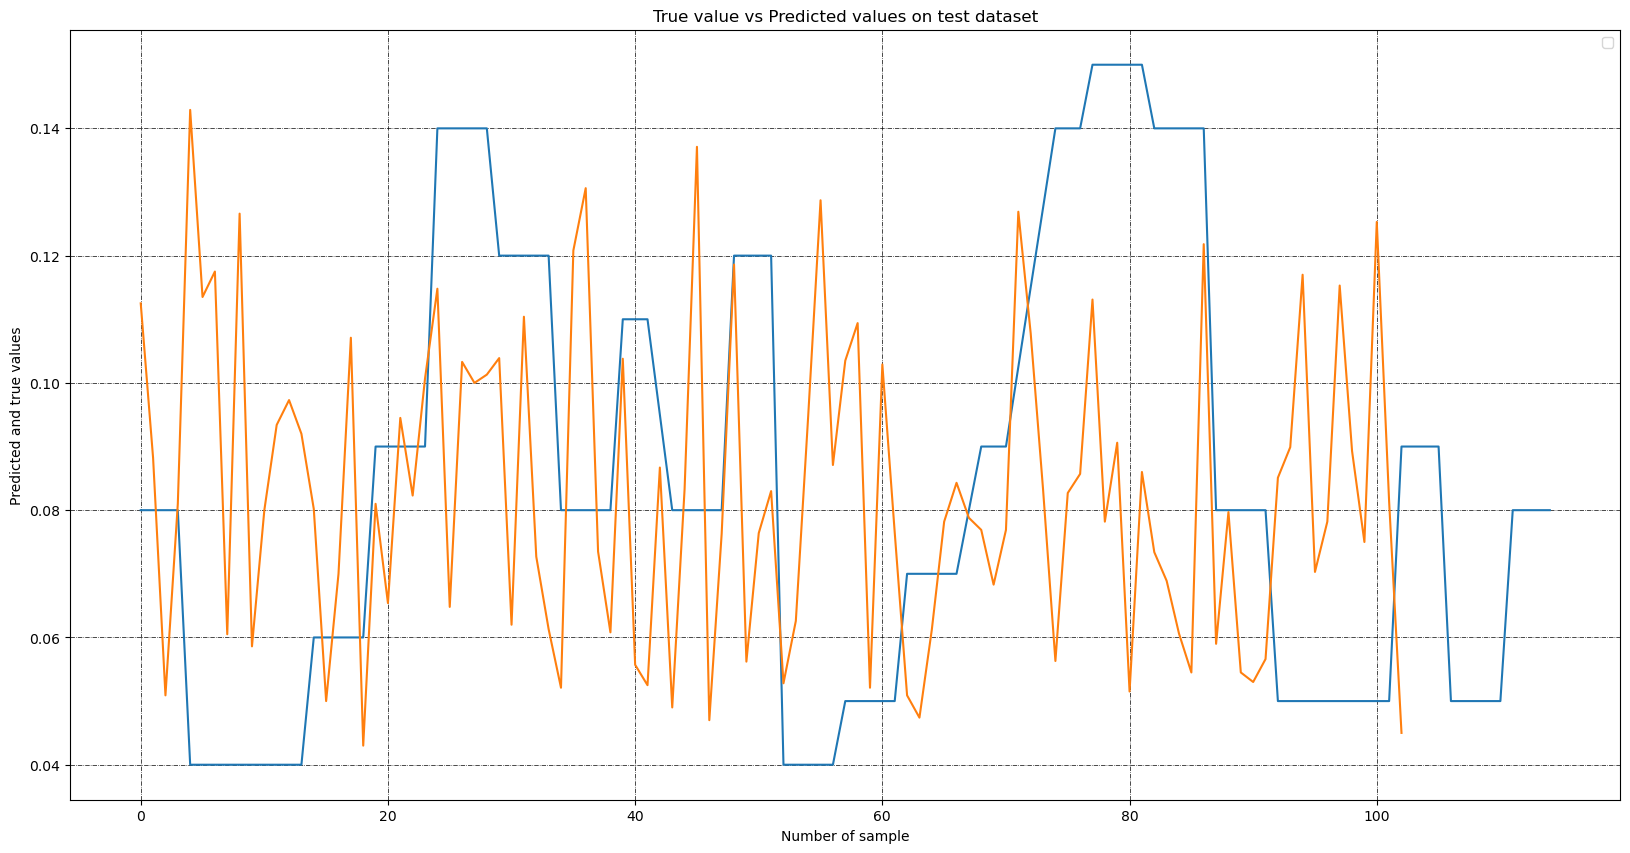

In [34]:
#plot on training dataset
plt.figure(figsize=(20, 10))
plt.title('True value vs Predicted values on test dataset')
plt.xlabel('Number of sample')
plt.ylabel('Predicted and true values')
plt.grid(True, color = "black", linewidth = "0.5", linestyle = "-.")
plt.legend(['True', 'Predicted'], loc = 1)
sns.lineplot(y_train)
sns.lineplot(rf_reg.predict(X_train))

In [28]:
y_test = np.array(y_test)
y_test

array([0.04, 0.09, 0.04, 0.09, 0.14, 0.04, 0.11, 0.12, 0.08, 0.14, 0.05,
       0.14])

In [29]:
y_pred = np.array(rf_reg.predict(X_test))
y_pred

array([0.0586, 0.1013, 0.0608, 0.113 , 0.0545, 0.1125, 0.1153, 0.0849,
       0.123 , 0.071 , 0.0804, 0.1218])

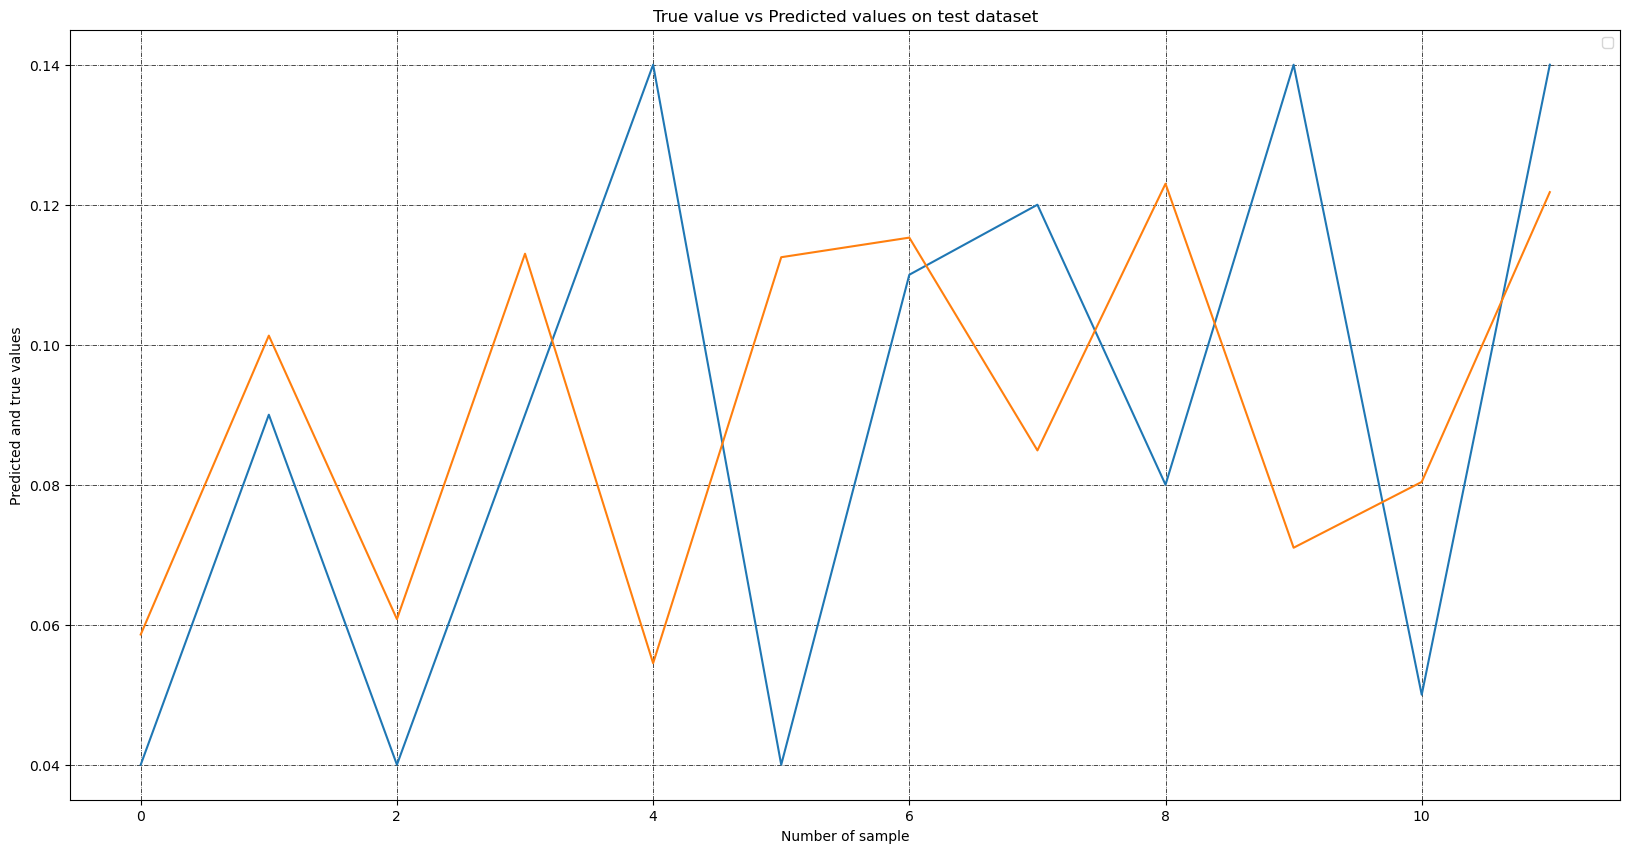

In [33]:
plt.figure(figsize=(20, 10))
plt.title('True value vs Predicted values on test dataset')
plt.xlabel('Number of sample')
plt.ylabel('Predicted and true values')
plt.grid(True, color = "black", linewidth = "0.5", linestyle = "-.")
plt.legend(['True', 'Predicted'], loc = 1)
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

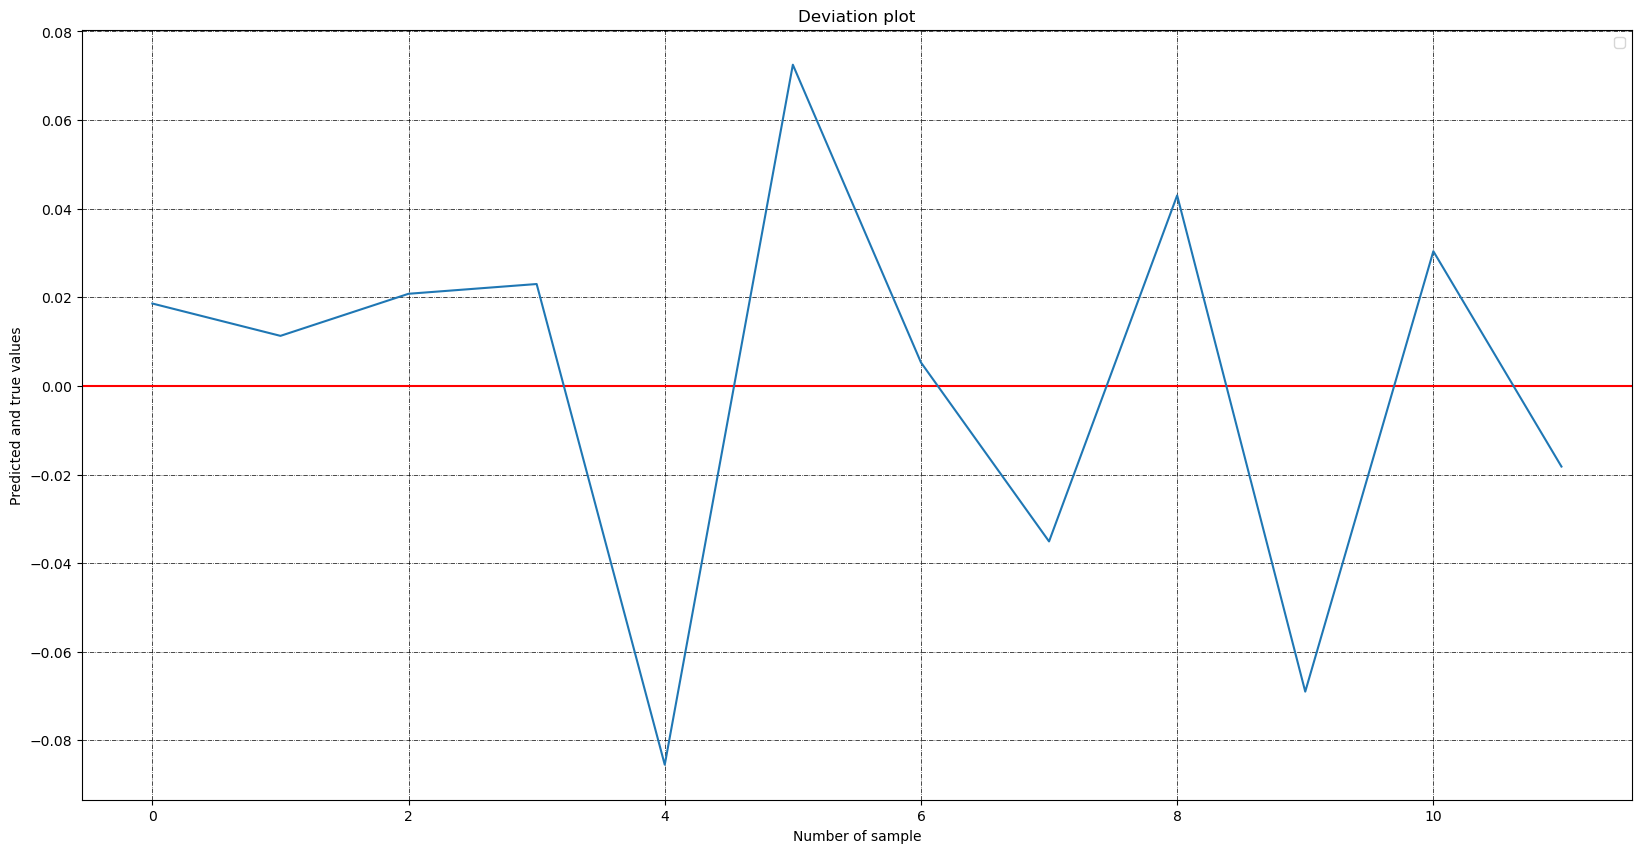

In [32]:
#Deviation Plot
plt.figure(figsize=(20, 10))
plt.title('Deviation plot')
plt.xlabel('Number of sample')
plt.ylabel('Predicted and true values')
plt.grid(True, color = "black", linewidth = "0.5", linestyle = "-.")
plt.legend(['True', 'Predicted'], loc = 1)

plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.plot(y_pred-y_test)




